year
1997      4
1998    197
1999    156
2000    145
2001    150
2002    129
2003    144
2004    134
2005    118
2006     84
2007     73
2008     97
2009     86
2010     77
2011     60
2012     86
2013    103
2014     99
2015    106
2016     84
2017     49
Name: provider_number, dtype: int64


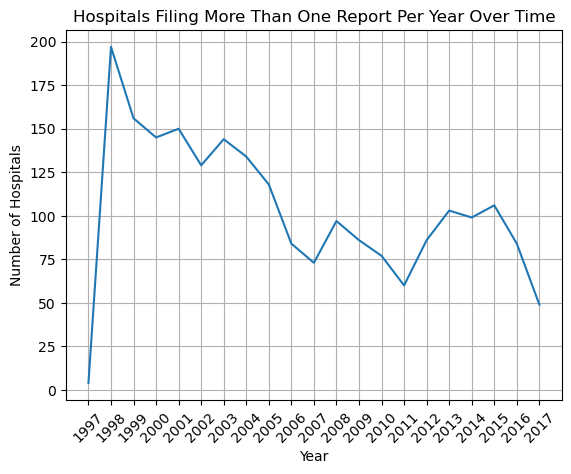

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in data
hcris_data=pd.read_csv('/Users/ryanscholte/Desktop/GitHub/HW2/data/output/HCRIS_Datac.csv')
hcris_data_preclean=pd.read_csv('/Users/ryanscholte/Desktop/GitHub/HW2/data/output/HCRIS_Data_preclean.csv')


# Convert 'fy_start' to datetime to extract the year
hcris_data_preclean['fy_start'] = pd.to_datetime(hcris_data_preclean['fy_start'], errors='coerce')
hcris_data_preclean['year'] = hcris_data_preclean['fy_start'].dt.year

# Count hospitals that filed more than one report in the same year
hospital_counts = hcris_data_preclean.groupby(['provider_number', 'year']).size().reset_index(name='report_count')
multiple_reports = hospital_counts[hospital_counts['report_count'] > 1]

# Count number of hospitals per year
hospitals_over_time = multiple_reports.groupby('year')['provider_number'].nunique()

print(hospitals_over_time)
# Plot the results
plt.figure()
plt.plot(hospitals_over_time.index, hospitals_over_time.values)
plt.xlabel('Year')
plt.xticks(hospitals_over_time.index, rotation=45) 
plt.ylabel('Number of Hospitals')
plt.title('Hospitals Filing More Than One Report Per Year Over Time')
plt.grid(True)
plt.show()

#count hospitals in year
# create new variable for total reports
#mutate if total reports >1 it has duplicate

In [12]:
# Remove duplicate reports by keeping only the first occurrence per hospital per year
unique_hospitals = hcris_data.drop_duplicates(subset=['provider_number', 'year'])

# Count the number of unique hospital IDs (Medicare provider numbers)
unique_hospital_count = unique_hospitals['provider_number'].nunique()

# Display the result
print("Number of unique hospital IDs:", unique_hospital_count)



Number of unique hospital IDs: 9323


count    1.169770e+05
mean     3.274865e+08
std      6.920872e+08
min      0.000000e+00
25%      2.539582e+07
50%      7.998540e+07
75%      3.291147e+08
max      1.863371e+10
Name: tot_charges, dtype: float64


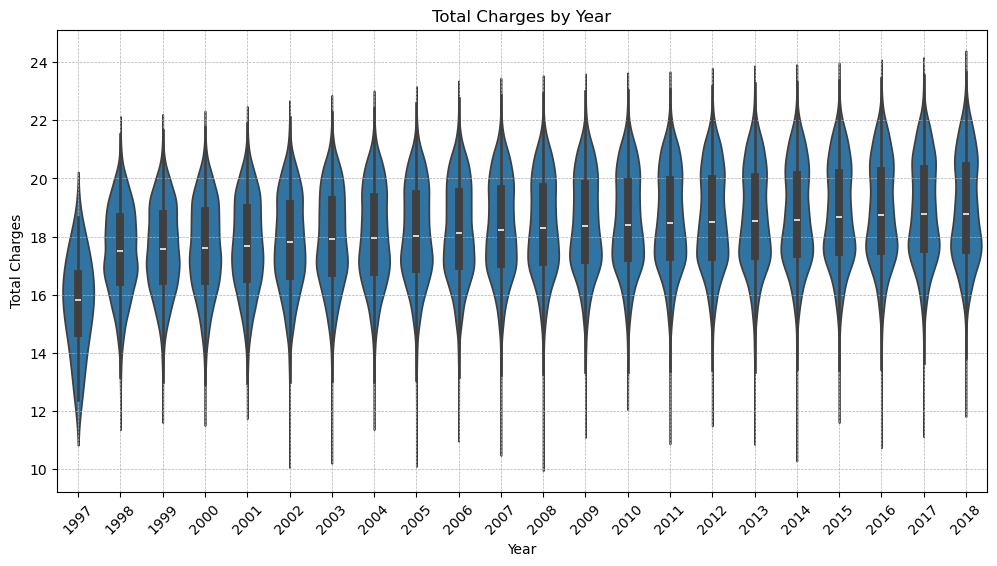

In [13]:
import seaborn as sns
#Question 3
hcris_data['tot_charges'] = pd.to_numeric(hcris_data['tot_charges'], errors='coerce')
# Convert tot_charges to numeric
hcris_data['tot_charges'] = pd.to_numeric(hcris_data['tot_charges'], errors='coerce')
#Remove rows with missing charges or years, negative values, and outliers
charges_by_year = hcris_data[['year','tot_charges']].dropna ()
# charges_by_year = charges_by_year [charges_by_year['tot_charges'] >= 0]
charges_by_year['tot_charges'] = charges_by_year['tot_charges'].abs()
# Display summary statistics to find cutoff values
summary_stats = charges_by_year ['tot_charges']. describe ()
print (summary_stats)
#creating upper bound limit
upper_bound = summary_stats['99%'] if '99%' in summary_stats else summary_stats['max']
charges_by_year = charges_by_year [charges_by_year['tot_charges'] <= upper_bound]
charges_by_year['log_tot_charges'] = np.log(charges_by_year['tot_charges'] + 1)  
charges_by_year = charges_by_year[charges_by_year['log_tot_charges'] >= 10]

# Adding 1 to avoid log(0)

# Plot violin plot
plt.figure(figsize=(12, 6)) 
sns.violinplot (x='year', y='log_tot_charges', data=charges_by_year)
plt.title("Total Charges by Year")
plt.xlabel ("Year")
plt.ylabel("Total Charges")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show( )



count    5.903200e+04
mean              inf
std               NaN
min      1.953267e+00
25%      4.806754e+03
50%      7.161668e+03
75%      1.034881e+04
max               inf
Name: estimated_price, dtype: float64


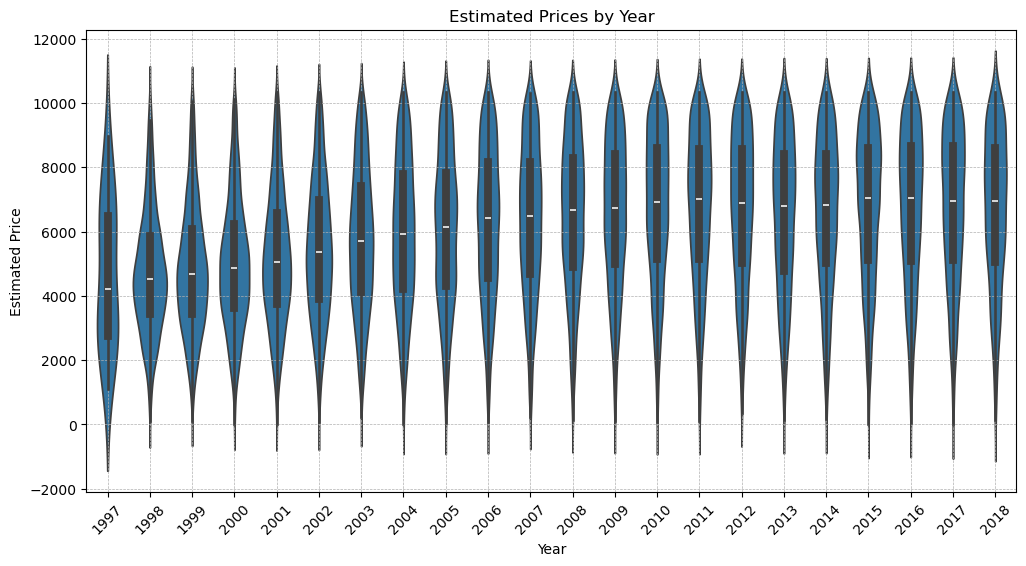

In [14]:
#Question 4
#Converting columns to numeric
numeric_columns = [
    'tot_discounts', 'tot_charges',
    'ip_charges', 'icu_charges', 'ancillary_charges',
    'tot_mcare_payment', 'tot_discharges', 'mcare_discharges'
]
hcris_data[numeric_columns] = hcris_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Remove missing values
hcris_clean = hcris_data[['year'] + numeric_columns].dropna( )
# Calculate estimated price based on the formula
discount_factor = 1 - hcris_clean['tot_discounts'] / hcris_clean ['tot_charges']
price_num = (hcris_clean['ip_charges'] + hcris_clean['icu_charges'] + hcris_clean['ancillary_charges']) * discount_factor - hcris_clean[ 'tot_mcare_payment']
price_denom = hcris_clean['tot_discharges'] - hcris_clean ['mcare_discharges']
hcris_clean['estimated_price'] = price_num/price_denom
#removing outliers and negatives
hcris_clean = hcris_clean[hcris_clean['estimated_price'] > 0]

summary_stats = hcris_clean['estimated_price'].describe()
print (summary_stats)
upper_bound = summary_stats ['75%'] if '75%' in summary_stats else summary_stats ['max']
hcris_clean = hcris_clean[hcris_clean['estimated_price'] <= upper_bound]
#Plot violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='estimated_price', data=hcris_clean)
plt.title("Estimated Prices by Year")
plt.xlabel ("Year")
plt.ylabel("Estimated Price")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt. show()

In [15]:
#Q5.

# Filter data to only include year 2012
hcris_2012 = hcris_data[hcris_data['year'] == 2012].copy()

# Calculate estimated price using the given formula
hcris_2012['discount_factor'] = 1 - (hcris_2012['tot_discounts'] / hcris_2012['tot_charges'])
hcris_2012['price_num'] = (hcris_2012['ip_charges'] + hcris_2012['icu_charges'] + hcris_2012['ancillary_charges']) * hcris_2012['discount_factor'] - hcris_2012['tot_mcare_payment']
hcris_2012['price_denom'] = hcris_2012['tot_discharges'] - hcris_2012['mcare_discharges']
hcris_2012['price'] = hcris_2012['price_num'] / hcris_2012['price_denom']

# Define penalty
hcris_2012['penalty'] = (hcris_2012['hrrp_payment'] + hcris_2012['hvbp_payment']) < 0

# Clean data
hcris_2012 = hcris_2012[(hcris_2012['price_denom'] > 100) & (hcris_2012['price_num'] > 0) & (hcris_2012['price'] > 0)]
hcris_2012 = hcris_2012[hcris_2012['beds'] > 30]
hcris_2012 = hcris_2012[hcris_2012['price'] < 100000]  

# NA payments
hcris_2012['hvbp_payment'] = hcris_2012['hvbp_payment'].fillna(0)
hcris_2012['hrrp_payment'] = hcris_2012['hrrp_payment'].fillna(0).abs()


# Calculate average price for penalized vs non-penalized hospitals
mean_penalized = round(hcris_2012.loc[hcris_2012['penalty'] == 1, 'price'].mean(), 2)
mean_non_penalized = round(hcris_2012.loc[hcris_2012['penalty'] == 0, 'price'].mean(), 2)

print(f"Mean price for penalized hospitals: {mean_penalized}")
print(f"Mean price for non-penalized hospitals: {mean_non_penalized}")

Mean price for penalized hospitals: 10171.54
Mean price for non-penalized hospitals: 9651.82


In [16]:
#Q6
hcris_2012['beds_quartile'] = pd.qcut(hcris_2012['beds'], 4, labels=[1, 2, 3, 4])

# Create indicator variables for each quartile
for i in range(1, 5):
    hcris_2012[f'quartile_{i}'] = (hcris_2012['beds_quartile'] == i).astype(int)


# Calculate average price for treated and control groups within each quartile
Avg_per_group = []
for i in range(1, 5):
    treated_mean = hcris_2012.loc[(hcris_2012[f'quartile_{i}'] == 1) & (hcris_2012['penalty'] == 1), 'price'].mean()
    control_mean = hcris_2012.loc[(hcris_2012[f'quartile_{i}'] == 1) & (hcris_2012['penalty'] == 0), 'price'].mean()
    Avg_per_group.append({'Quartile': i, 'Penalized_Mean_Price': round(treated_mean, 2), 'Non_penalized_Mean_Price': round(control_mean, 2)})

results_df = pd.DataFrame(Avg_per_group)
print(results_df)

   Quartile  Penalized_Mean_Price  Non_penalized_Mean_Price
0         1               7581.19                   7871.93
1         2               9835.01                   8584.81
2         3               9982.35                   9930.10
3         4              12435.12                  12263.70


In [49]:
from causalinference import CausalModel
hcris_2012['bed_quartile'] = pd.qcut(hcris_2012['beds'], 4, labels=False)


y = hcris_2012['price'].values
D = hcris_2012['penalty'].values
X = hcris_2012[['bed_quartile']].values
causal_model = CausalModel(Y=y, D=D, X=X)

results = pd.DataFrame(index=['ATE', 'SE'], columns= ['INV', 'MAH', 'IPW', 'OLS'])

# Estimate with inverse weighting
causal_model.est_via_matching(weights='inv', matches=1, bias_adj=True)
inv_ate = causal_model.estimates['matching']['ate']
inv_se = causal_model.estimates['matching']['ate_se']
results.loc['ATE', 'INV'] = inv_ate
results.loc['SE', 'INV'] = inv_se


# Estimate with Mahalanobis distance
causal_model.est_via_matching(weights='maha', matches=1, bias_adj=True)
maha_ate = causal_model.estimates['matching']['ate']
maha_se = causal_model.estimates['matching']['ate_se']
results.loc['ATE', 'MAH'] = maha_ate
results.loc['SE', 'MAH'] = maha_se


# Estimate Propensity Scores using the built-in method
causal_model.est_propensity()
causal_model.est_via_weighting()
ipw_ate = causal_model.estimates['weighting']['ate']
ipw_se = causal_model.estimates['weighting']['ate_se']
results.loc['ATE', 'IPW'] = ipw_ate
results.loc['SE', 'IPW'] = ipw_se

causal_model.est_via_ols(adj=2)
ols_ate = causal_model.estimates['ols']['ate']
ols_se = causal_model.estimates['ols']['ate_se']
results.loc['ATE', 'OLS'] = ols_ate 
results.loc['SE', 'OLS'] = ols_se 

print(results)



/Users/ryanscholte/anaconda3/lib/python3.10/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


            INV         MAH         IPW         OLS
ATE  299.275537  299.275537   374.52638  374.502777
SE   624.023041  624.023041  614.755618  614.894143


/Users/ryanscholte/anaconda3/lib/python3.10/site-packages/causalinference/estimators/weighting.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wlscoef = np.linalg.lstsq(Z_w, Y_w)[0]
/Users/ryanscholte/anaconda3/lib/python3.10/site-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]
